##MDI720

TP n°1: Introduction à Pandas, Matplotlib, etc

In [1]:
from os import path
import pandas as pd
import urllib
import zipfile
import sys
import numpy as np
from ggplot import *
import matplotlib.pyplot as plt
%matplotlib notebook

/home/ariane/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/ariane/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/home/ariane/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/'

filename = 'household_power_consumption'
zipfilename = filename + '.zip'
Location = url + zipfilename

# testing existance of file:   
if sys.version_info >= (3, 0):
    if not(path.isfile('zipfilename')):
        urllib.request.urlretrieve(Location, zipfilename)
    else:
        if not(path.isfile('zipfilename')):
            urllib.urlretrieve(Location, zipfilename)
            
# unzip part
zip = zipfile.ZipFile(zipfilename)
zip.extractall()
na_values = ['?',''] # tout ce kon aimerais considerer cme na
fields = ['Date', 'Time', 'Global_active_power']
df = pd.read_csv(filename + '.txt', sep = ';', nrows = 200000, na_values = na_values, usecols = fields)

Question 1: Détecter et dénombrer le nombre de lignes ayant des valeurs manquantes

In [3]:
df.shape[0] - pd.notnull(df.Global_active_power).value_counts()[True]

3732

Question 2:

In [4]:
df = df.dropna(how = 'any')
# vérification
df.shape[0] - pd.notnull(df.Global_active_power).value_counts()[True]

0

Question 3

In [5]:
df['DateTime'] = pd.to_datetime(df.Date +" "+ df.Time, format='%d/%m/%Y %H:%M:%S')
df = df.set_index('DateTime')
df.head()

,Date,Time,Global_active_power
DateTime,,,
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666


Question 4

<IPython.core.display.Javascript object>


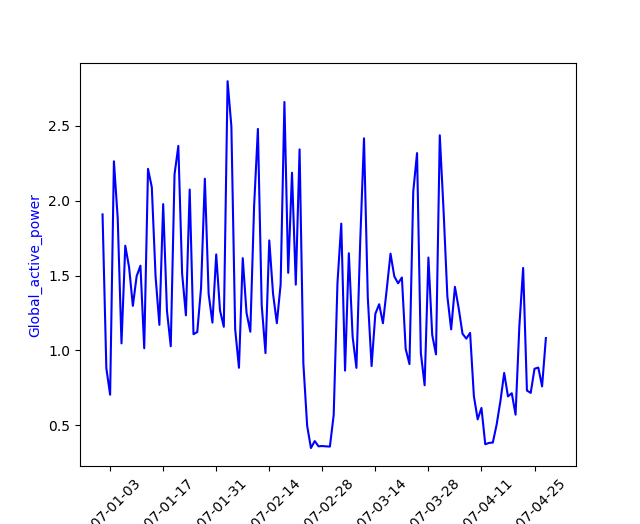

In [6]:
data1 = df.loc["2007-01-01":"2007-04-30",:].resample("1D").mean()
data1["DateTime"] = data1.index
plt.figure()
plt.plot(data1.DateTime, data1.Global_active_power, color='b')
plt.ylabel('Global_active_power', color='b')
plt.xticks(rotation = 45)
plt.show()

Question 5

In [7]:
# Importation de la base de données à étudier
fields2 = ['    DATE', '   TG']
na_values = ['?','']
df2 = pd.read_csv('TGSTAID011249.txt', sep = ',', na_values = na_values, usecols = fields2, comment = '#')

In [8]:
# renomer les variables
df2 = df2.rename(columns={"    DATE": "DATE", "   TG": "TG"})
# élimination des valeurs manquantes
df2 = df2.dropna(how = 'any')
# Conversion de la variable 'TG' en degrés Celsius
df2.TG = df2.TG/10.0

# traitement des éléments de température abérantes
df2.TG = df2.TG.where(df2.TG != -999.9, np.nan) # considérons comme température abérantes celles = -999.9 50
df2 = df2.dropna(how = 'any') #élimination des valeurs manquantes provenant des températures abérantes 

Question 6

In [9]:
# création de la time series
df2['DateTime'] = pd.to_datetime(df2.DATE, format='%Y%m%d')
df2 = df2.set_index('DateTime')
data2 = df2.loc["2007-01-01":"2007-04-30",:].resample("1D").mean()
data2.head()

,DATE,TG
DateTime,,
2007-01-01,20070101,9.6
2007-01-02,20070102,6.0
2007-01-03,20070103,6.1
2007-01-04,20070104,9.2
2007-01-05,20070105,10.0


In [10]:
# plot
Dat = pd.DataFrame()
Dat["Global_active_power"] = data1.Global_active_power
Dat["TG"] = data2.TG
Dat["DateTime"] = data1.DateTime

<IPython.core.display.Javascript object>


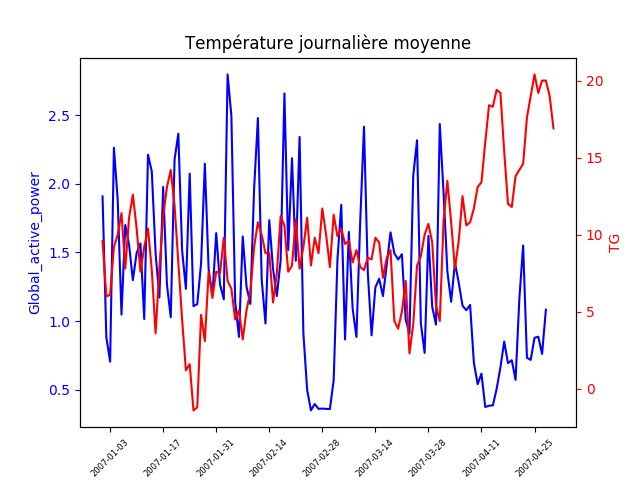

In [11]:
fig, ax1 = plt.subplots()
ax1.plot(Dat.DateTime, Dat.Global_active_power, color='b')
ax1.set_xlabel('Date')
ax1.set_ylabel('Global_active_power', color='b')
ax1.tick_params('y', colors='b')
plt.xticks(rotation = 45,fontsize=6)
ax2 = ax1.twinx()
ax2.plot(Dat.DateTime, Dat.TG, color='r')
ax2.set_ylabel('TG', color='r')
ax2.tick_params('y', colors='r')
plt.title('Température journalière moyenne')
plt.show()


Question 7

In [12]:
# Importation de la base de données
zip = zipfile.ZipFile('airparifabae1bd78def4fe8a409ab8c95fc4608.zip')
zip.extractall()
na_values3 = [' ','n/d', 'microg/m3','microg/m3']
df3 = pd.read_csv('20080421_20160927-PA13_auto.csv', sep = ';', na_values = na_values3)

In [13]:
df3 = df3.dropna(how = 'any')
df3.heure = df3.heure%24 #transformation de 24h en 00h
df3['heure']= df3['heure'].astype(int)
df3['heure']= df3['heure'].astype(str)
df3['DateTime'] = pd.to_datetime(df3.date +" "+ df3.heure, format='%d/%m/%Y %H')
df3 = df3.set_index('DateTime')
df3.head()

,date,heure,NO2,O3
DateTime,,,,
2008-04-21 01:00:00,21/04/2008,1,13.0,74.0
2008-04-21 02:00:00,21/04/2008,2,11.0,73.0
2008-04-21 03:00:00,21/04/2008,3,13.0,64.0
2008-04-21 04:00:00,21/04/2008,4,23.0,46.0
2008-04-21 05:00:00,21/04/2008,5,47.0,24.0


<IPython.core.display.Javascript object>


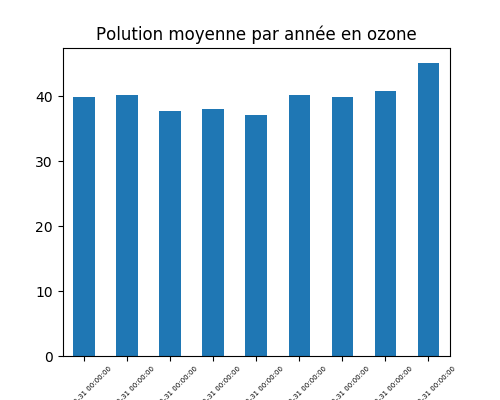

In [14]:
pol_O3_mean = df3.resample("1A").mean()
plt.figure(figsize=(5,4))
pol_O3_mean.O3.plot.bar()
plt.xticks(rotation = 45, fontsize=5)
plt.title('Polution moyenne par année en ozone')

Question 8

<IPython.core.display.Javascript object>


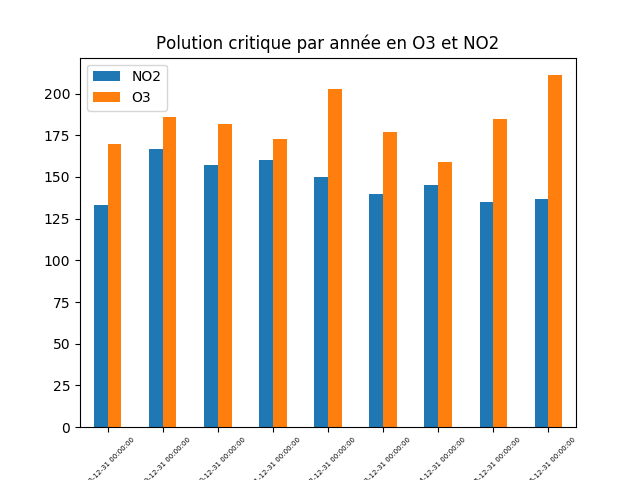

In [15]:
pol_max = df3.resample("1A").max()
pol_max.plot.bar()
plt.xticks(rotation = 45, fontsize=5)
plt.title('Polution critique par année en O3 et NO2')

Question 9

<IPython.core.display.Javascript object>


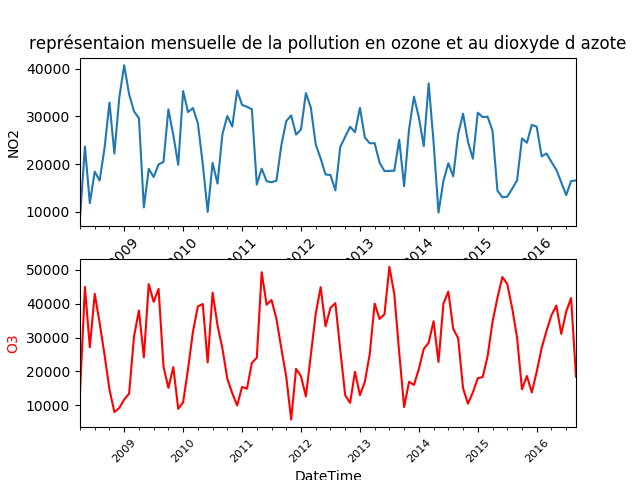

In [16]:
%matplotlib notebook
pol_sum = df3.resample("1M").sum()
plt.subplot(2, 1, 1)
pol_sum.NO2.plot() 
plt.xticks(rotation = 45)
plt.ylabel('NO2')
plt.title('représentaion mensuelle de la pollution en ozone et au dioxyde d azote')

plt.subplot(2, 1, 2)
pol_sum.O3.plot(color='r') 
plt.xticks(rotation = 45, fontsize=8)
plt.ylabel('O3', color='r')


Les shéma ci-dessus nous montre que les séries NO2 et O3 (en terme de somme mensuelle) sont périodiques de période 1 an. D'où le dégré de pollution mensuelle est statistiquement équivalent pour chaque année. Nous pouvons donc faire une représentation par mois de la pollution à l'ozone et au dioxyde d'azote (Voir le graphe ci-dessous).

<IPython.core.display.Javascript object>


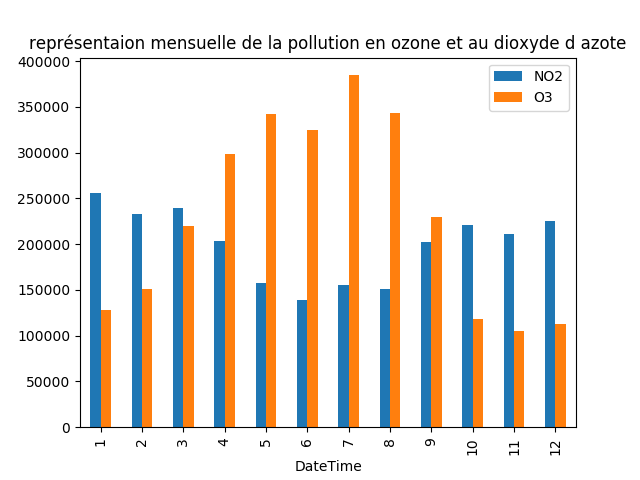

In [17]:
pol_sum_an = df3.groupby(df3.index.year).sum()
pol_sum_moi = df3.groupby(df3.index.month).sum()
pol_sum_moi.plot.bar()
plt.title('représentaion mensuelle de la pollution en ozone et au dioxyde d azote')

Le mois le plus polué en Ozone est le mois Janvier et le mois le plus polué en Azote est le mois Juillet. Une autre méthode pour le montrer est de faire ce shéma pour chaque année puis prendre le mois dont la fréquence est maximale.